<a href="https://colab.research.google.com/github/kwon0915/Kwon-Hyeong-Joong/blob/master/iris_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Module Name : iris_lec_dl.sample.py
#DL : 가중치 조절, 정규배치 잘하면 점수 잘나옴

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#keras에도 iris있지만 여기서는 sklearn꺼 쓰겠음
from sklearn.datasets import load_iris

import tensorflow as tf
#Sequential안에 모델을 하나하나 쌓아야함
from keras.models import Sequential
#층별로 쌓음
from keras.layers import Dense

np.random.seed(121)
tf.random.set_seed(121) #ml에서의 randomstate값 같은것. #일괄 적용 되므로 일일이 안써도 됨

In [ ]:
dataset = load_iris()
col_name=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df = pd.DataFrame(data=dataset.data, columns=col_name)
df["target"] = dataset.target

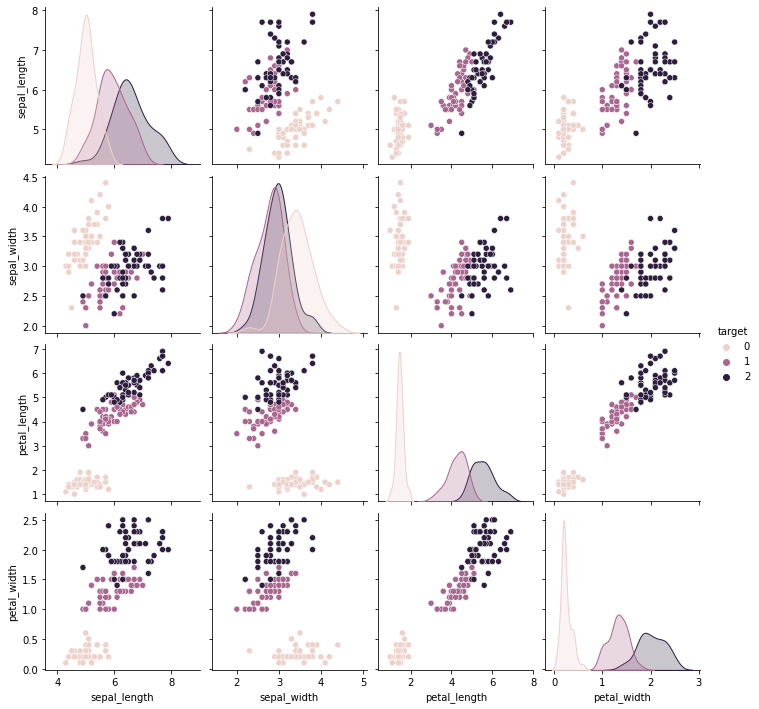

In [ ]:
sns.pairplot(df, hue="target")
plt.show()

In [ ]:
문제 = df.drop("target", axis=1, inplace=False) #타겟을 제외한 나머지
답안 = df["target"] #타겟만
print(답안[:5])

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


In [ ]:
#rf_model = RandomForestClassifier()
model = Sequential() #모델 사용                  #입력
model.add(Dense(units=16, input_dim=4, activation="relu")) #dense : 깊이, 이하 항목 지정을 통칭, input_dim: target 이외의 나머지 feature
#layer 넣고 싶음 만큼 add해서 넣으면 됨 #무조건 Units(hidden layer의 Node 수)지정해야 함. 나머지 옵션은 줘도 안줘도 무방 / input_dim: target 이외의 나머지 feature. 만약 가공했으면 가공한 수만큼 넣기)
model.add(Dense(units=8, activation="relu")) #relu : 은닉층으로 학습을 하는 것
#Relu 사용 이유는 gradient vanishing(역전파 소실)우려 위해서 Relu를 통해 0과 원본 x를 유지하고자 함. Relu:hidden에 사용
model.add(Dense(units=3, activation="softmax")) #출력, 마친다는 의미로 softmax, 아이리스 꽃이 3종이기에 unit : 3
#몇 개의 값으로 분리시켜줄거냐 따라서 units=3으로 설정(3개의 종류중 하나) #sigmoid면 units=1(0이냐 1이냐)

In [ ]:
#loss optimizer matrix        #compile : 기계가 이해할 수 있도록 정보를 입력
model.compile(optimizer="adam", #     , GD(경사하강), SGD, momentum, ada.., adam
              #loss : 손실함수(activation 함수와 연관이 되고 맞춰줘야 함), 한두개면(sigmoid) binary , 여러개면(원핫 안했으면) sparse, 원핫같은 경우 categorical
              loss='sparse_categorical_crossentropy', #손실함수(cost loss) #sigmoid면 binary, 여러개면 categorical #onehotencoding한 상태면 sparse_categorical_crossentropy로
              metrics=["accuracy"]) #metrics : 평가기준(이곳에서는 accuracy(정확도))

In [ ]:
#epochs : 역전파(전제 데이터의 사용횟수)
model.fit(x=문제, y=답안, epochs = 200, validation_split= 0.2) #x=,y=안 쓰고 바로 문제,답안 이렇게 써도 됨/ #batch_size=몇개로 나눠서 넣을 것인지/ #epochs=1:backpropagation 1번 함 #callback: earlystopping, checkpoint등 가능
#validation_split=0.2 or validation_data = 30 or validation_data = 문제_테스트20, 답안_테스트20 이렇게 해줘도 됨 #epochs 1회당 crossentropy 계산 후 최소 비용 찾아냄
#res = model.fit(x=문제, y=답안, epochs = 100, validation_split= 0.2)

Epoch 1/200
4/4 [==============================] - 1s 158ms/step - loss: 1.3864 - accuracy: 0.4094 - val_loss: 1.6952 - val_accuracy: 0.0000e+00
Epoch 2/200
4/4 [==============================] - 0s 15ms/step - loss: 1.2266 - accuracy: 0.4333 - val_loss: 1.6073 - val_accuracy: 0.0000e+00
Epoch 3/200
4/4 [==============================] - 0s 14ms/step - loss: 1.1725 - accuracy: 0.3594 - val_loss: 1.5610 - val_accuracy: 0.0000e+00
Epoch 4/200
4/4 [==============================] - 0s 15ms/step - loss: 1.1425 - accuracy: 0.1281 - val_loss: 1.5352 - val_accuracy: 0.0000e+00
Epoch 5/200
4/4 [==============================] - 0s 14ms/step - loss: 1.0816 - accuracy: 0.2271 - val_loss: 1.5369 - val_accuracy: 0.0000e+00
Epoch 6/200
4/4 [==============================] - 0s 14ms/step - loss: 1.0565 - accuracy: 0.3960 - val_loss: 1.5473 - val_accuracy: 0.0000e+00
Epoch 7/200
4/4 [==============================] - 0s 14ms/step - loss: 1.0247 - accuracy: 0.4156 - val_loss: 1.5663 - val_accuracy: 0.

In [ ]:
#res.history()
#history.history : 에폭으로 학습을 하며 손실값이나 그것에 대한 특정 값을 기록
loss = model.history.history['loss'] #loss : 손실률(훈련 손실값)
vloss = model.history.history['val_loss'] #val_loss : 평가 손실률(검증 손실값)
accuracy = model.history.history['accuracy'] #accuracy : 정확도
val_accuracy = model.history.history['val_accuracy'] #val_accuracy : 평가 정확도

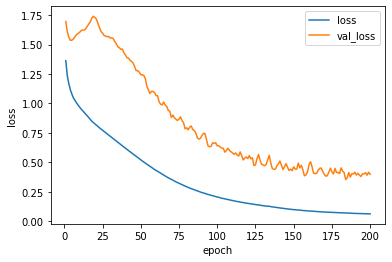

In [ ]:
#arange 개수는 위의 epochs + 1 하기
plt.plot(np.arange(1, 201), loss, label="loss") #x축 에폭/ y에는 loss와 vloss 둘다 담기 #epoch이 1부터 시작하므로 1,101
plt.plot(np.arange(1, 201), vloss, label="val_loss")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show() #최대 에폭 150으로 잡아도 될듯(그 이상으로 내려갈 기미가 별로 안보이므로..)

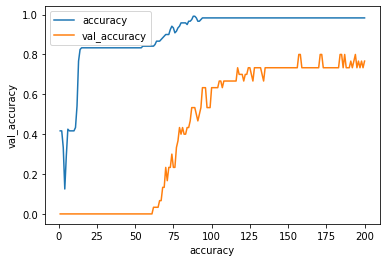

In [ ]:
plt.plot(np.arange(1, 201), accuracy, label="accuracy")
plt.plot(np.arange(1, 201), val_accuracy, label="val_accuracy")
plt.legend()
plt.xlabel("accuracy")
plt.ylabel("val_accuracy")
plt.show() #80~100사이가 적당할듯? (이미 100을 넘으면 점수가 고정되서 나아질 기미가 안보임)

In [ ]:
acc = model.evaluate(문제, 답안)
print("epoch 200회 평균 acc 점수:", acc) #[0.12794512510299683, 0.9399999976158142]

5/5 [==============================] - 0s 2ms/step - loss: 0.1279 - accuracy: 0.9400
epoch 200회 평균 acc 점수: [0.12794512510299683, 0.9399999976158142]
